# Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

# Load DataBase 

In [2]:
df= pd.read_csv('WH90_17.csv')

# Visualisation Time Series

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

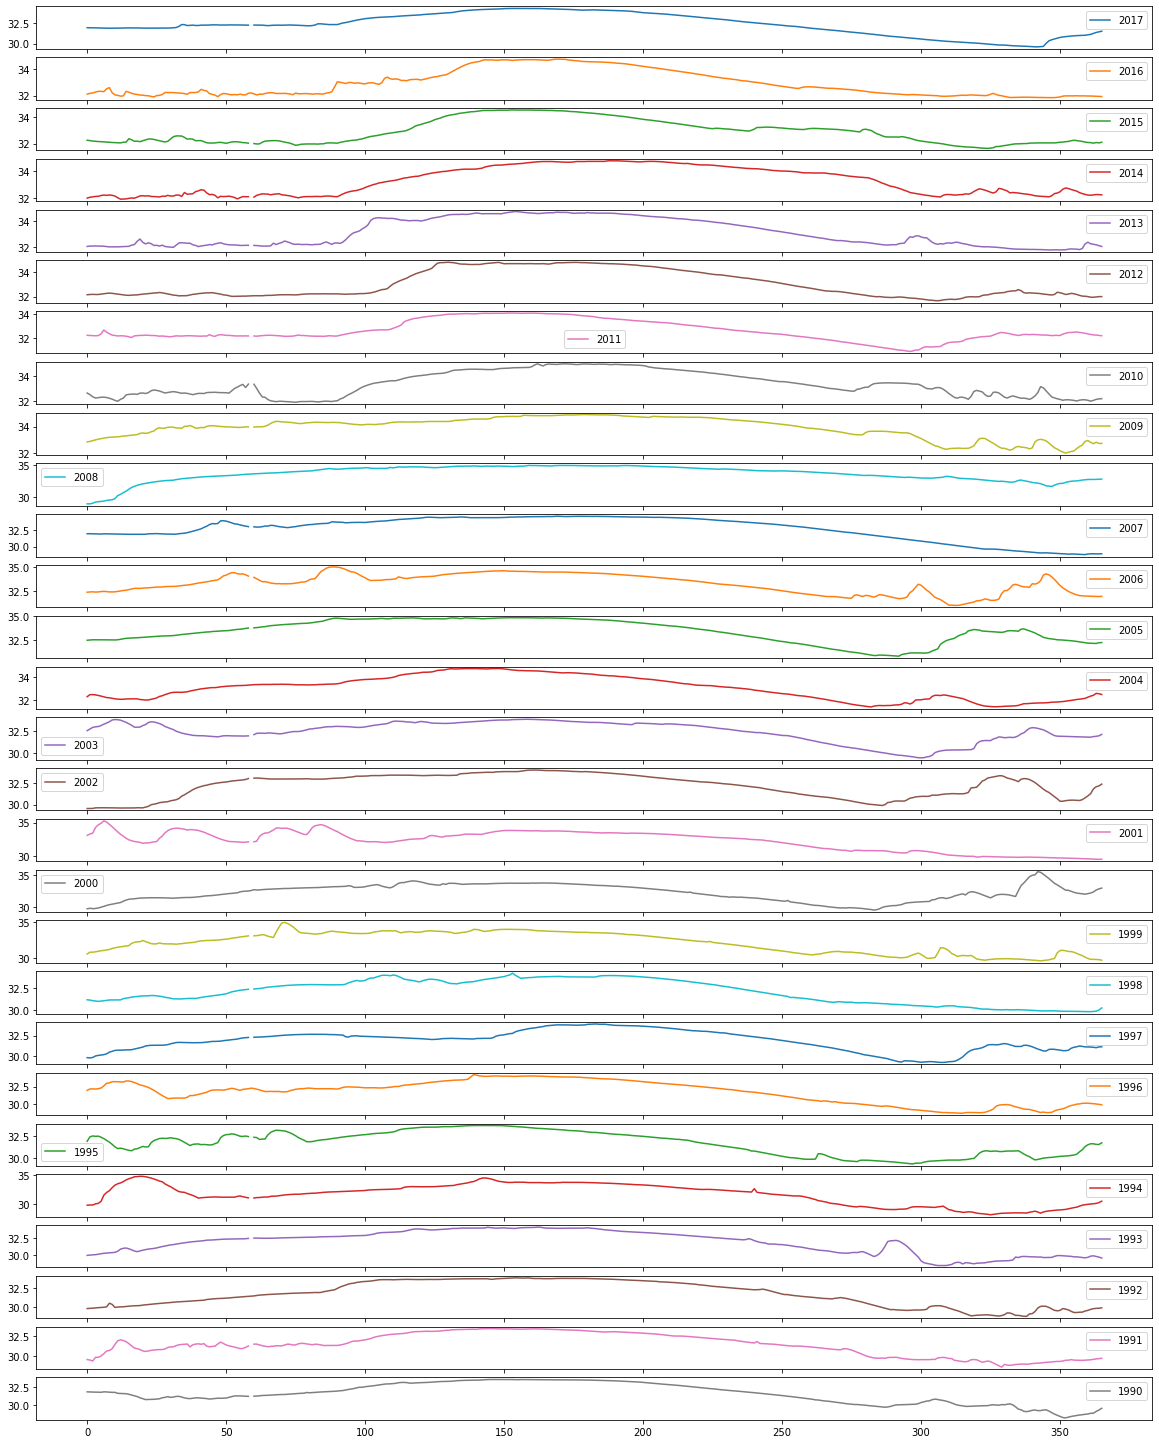

In [3]:
df.plot(subplots=True, figsize=(20, 26))

# SAX Implementation

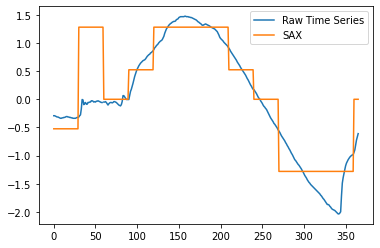

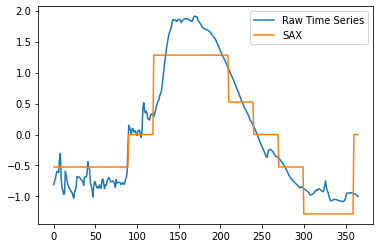

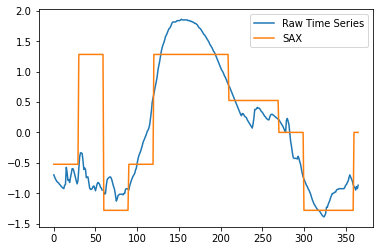

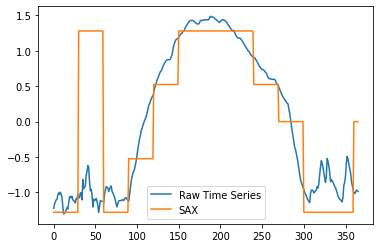

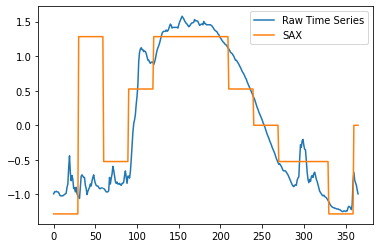

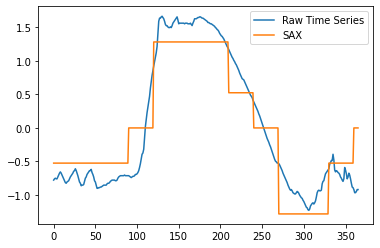

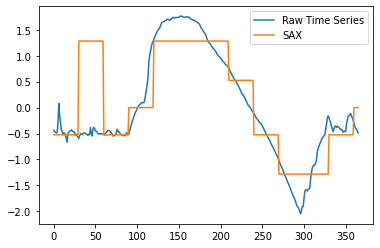

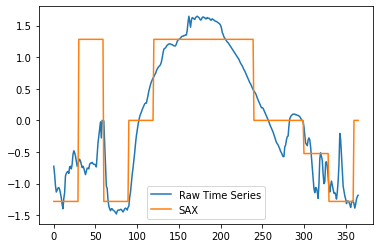

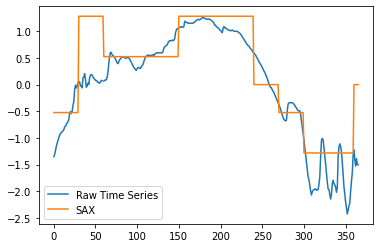

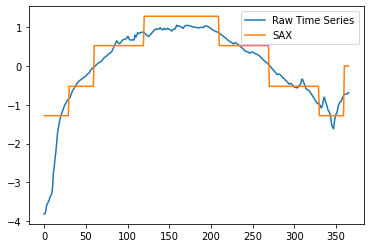

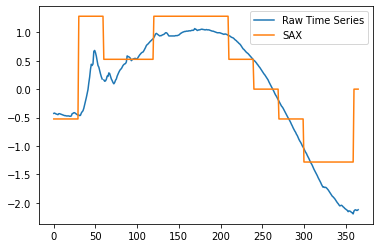

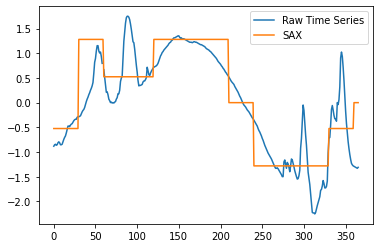

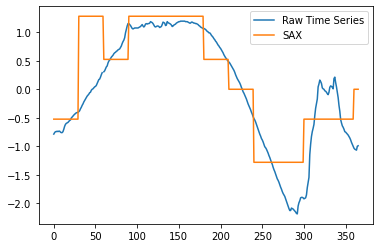

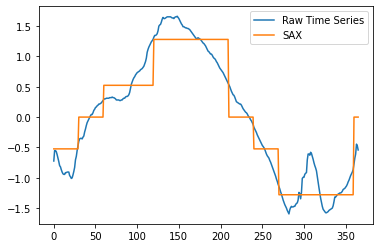

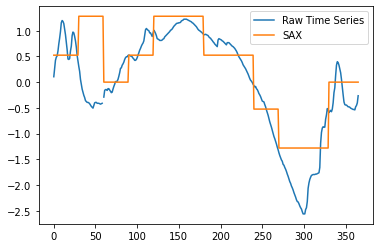

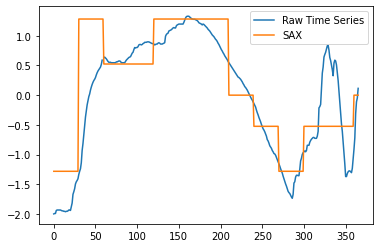

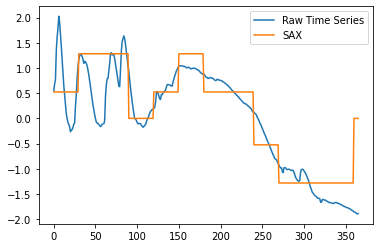

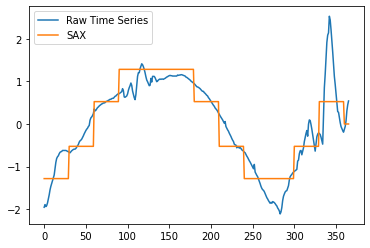

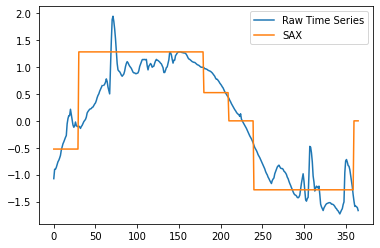

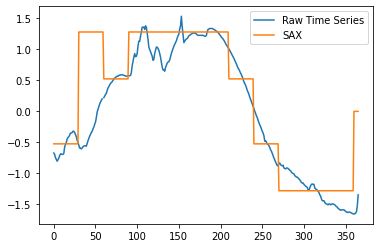

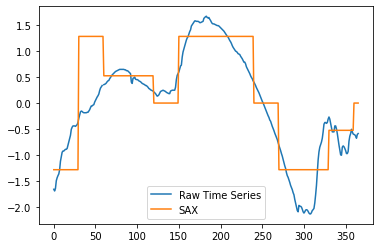

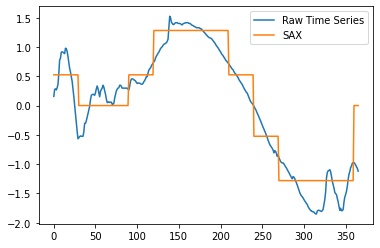

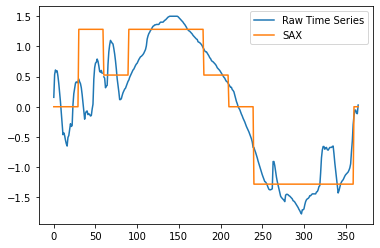

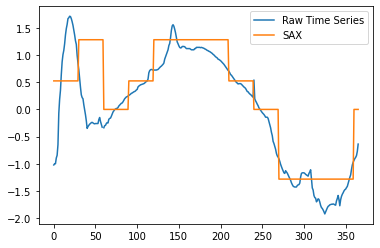

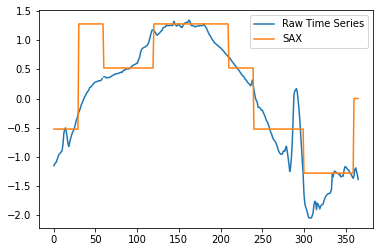

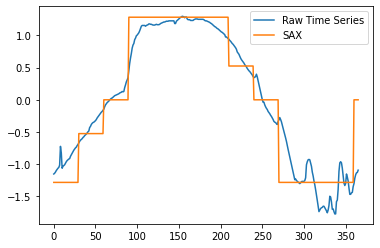

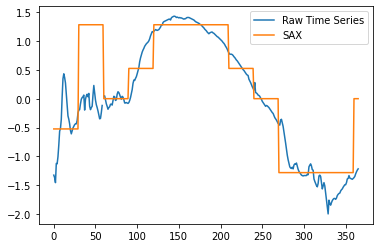

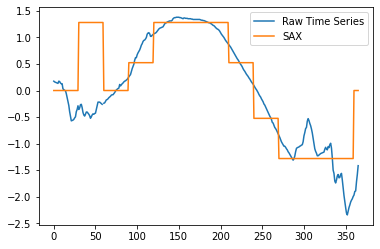

In [4]:
segment = 12
avg = 5
dict = {}
for i in range(df.shape[1]):
    df_Series=df.iloc[:,i]
    dataset = df_Series.values
    dataset=dataset.reshape(1, 366)
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) 
    dataset = scaler.fit_transform(dataset)

    sax = SymbolicAggregateApproximation(n_segments= segment,  alphabet_size_avg=avg)
    sax_dataset_inv = sax.inverse_transform(sax.fit_transform(dataset))
    dict[i] = sax.fit_transform(dataset)
    
    plt.plot(dataset[0].ravel(),label='Raw Time Series')
    plt.plot(sax_dataset_inv[0].ravel(), label='SAX')
    plt.legend(loc='best')
    plt.show()

# Time Series Mining (Motifs)

In [5]:
wh= pd.read_csv('SAX.csv',index_col=False)
saxlist = wh.values.tolist()
prs = np.array(saxlist).T
prs

array([[1, 4, 2, 3, 4, 4, 4, 3, 2, 0, 0, 0],
       [1, 1, 1, 2, 4, 4, 4, 3, 2, 1, 0, 0],
       [1, 4, 0, 1, 4, 4, 4, 3, 3, 2, 0, 0],
       [0, 4, 0, 1, 3, 4, 4, 4, 3, 2, 0, 0],
       [0, 4, 1, 3, 4, 4, 4, 3, 2, 1, 1, 0],
       [1, 1, 1, 2, 4, 4, 4, 3, 2, 0, 0, 1],
       [1, 4, 1, 2, 4, 4, 4, 3, 1, 0, 0, 1],
       [0, 4, 0, 2, 4, 4, 4, 4, 2, 2, 1, 0],
       [1, 4, 3, 3, 3, 4, 4, 4, 2, 1, 0, 0],
       [0, 1, 3, 3, 4, 4, 4, 3, 3, 1, 1, 0],
       [1, 4, 3, 3, 4, 4, 4, 3, 2, 1, 0, 0],
       [1, 4, 3, 3, 4, 4, 4, 2, 0, 0, 0, 1],
       [1, 4, 3, 4, 4, 4, 3, 2, 0, 0, 1, 1],
       [1, 2, 3, 3, 4, 4, 4, 2, 1, 0, 0, 0],
       [3, 4, 2, 3, 4, 4, 3, 3, 1, 0, 0, 2],
       [0, 4, 3, 3, 4, 4, 4, 2, 1, 0, 1, 1],
       [3, 4, 4, 2, 3, 4, 3, 3, 1, 0, 0, 0],
       [0, 1, 3, 4, 4, 4, 3, 1, 0, 0, 1, 3],
       [1, 4, 4, 4, 4, 4, 3, 2, 0, 0, 0, 0],
       [1, 4, 3, 4, 4, 4, 4, 3, 1, 0, 0, 0],
       [0, 4, 3, 3, 2, 4, 4, 4, 2, 0, 0, 1],
       [3, 2, 2, 3, 4, 4, 4, 3, 1, 0, 0, 0],
       [2,

# Prefix Span

In [6]:
from prefixspan import PrefixSpan

In [7]:
ps = PrefixSpan(prs)
a= ps.frequent(4)
for i in range (len(a)):
    if (len(a[i][1]) >= 10 ):
        print(f"{a[i][0]} : {a[i][1]}")

4 : [1, 4, 3, 4, 4, 4, 3, 2, 0, 0]
4 : [1, 4, 4, 4, 4, 3, 2, 0, 0, 0]
4 : [4, 2, 3, 4, 4, 4, 3, 0, 0, 0]
4 : [4, 3, 4, 4, 4, 3, 2, 0, 0, 0]
4 : [2, 3, 4, 4, 4, 3, 2, 0, 0, 0]


In [8]:
from prefixspan import PrefixSpan
sup = 1
anne = 2017
for idx in range (df.shape[1]) :     
    ps = PrefixSpan(dict[idx][0])
    print(f"{anne} : {ps.frequent(sup)}")
    anne = anne - 1


2017 : [(1, [1]), (4, [4]), (2, [2]), (2, [3]), (3, [0])]
2016 : [(4, [1]), (2, [2]), (3, [4]), (1, [3]), (2, [0])]
2015 : [(2, [1]), (4, [4]), (3, [0]), (2, [3]), (1, [2])]
2014 : [(4, [0]), (4, [4]), (1, [1]), (2, [3]), (1, [2])]
2013 : [(2, [0]), (4, [4]), (3, [1]), (2, [3]), (1, [2])]
2012 : [(4, [1]), (2, [2]), (3, [4]), (1, [3]), (2, [0])]
2011 : [(4, [1]), (4, [4]), (1, [2]), (1, [3]), (2, [0])]
2010 : [(3, [0]), (5, [4]), (3, [2]), (1, [1])]
2009 : [(2, [1]), (4, [4]), (3, [3]), (1, [2]), (2, [0])]
2008 : [(2, [0]), (3, [1]), (4, [3]), (3, [4])]
2007 : [(2, [1]), (4, [4]), (3, [3]), (1, [2]), (2, [0])]
2006 : [(2, [1]), (4, [4]), (2, [3]), (1, [2]), (3, [0])]
2005 : [(3, [1]), (4, [4]), (2, [3]), (1, [2]), (2, [0])]
2004 : [(2, [1]), (2, [2]), (2, [3]), (3, [4]), (3, [0])]
2003 : [(4, [3]), (3, [4]), (2, [2]), (1, [1]), (2, [0])]
2002 : [(2, [0]), (4, [4]), (2, [3]), (1, [2]), (3, [1])]
2001 : [(4, [3]), (3, [4]), (1, [2]), (1, [1]), (3, [0])]
2000 : [(3, [0]), (3, [1]), (3, [3